In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AR
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [34]:
df = pd.read_csv('covid_19_data1.csv',parse_dates=['Last Update'])

In [35]:
df.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [36]:
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df_date = df.groupby(['Date'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [37]:
df_date

,Date,Confirmed,Deaths,Recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0
5,01/27/2020,2927.0,82.0,61.0
6,01/28/2020,5578.0,131.0,107.0
7,01/29/2020,6165.0,133.0,126.0
8,01/30/2020,8235.0,171.0,143.0
9,01/31/2020,9925.0,213.0,222.0


In [38]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
Date         55 non-null object
Confirmed    55 non-null float64
Deaths       55 non-null float64
Recovered    55 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.8+ KB


In [39]:
df_date.isnull().any()

Date         False
Confirmed    False
Deaths       False
Recovered    False
dtype: bool

In [40]:
date_confirmed = df_date[['Date', 'Confirmed']]
date_death = df_date[['Date', 'Deaths']]
date_recovered = df_date[['Date', 'Recovered']]

In [41]:
for index, row in date_confirmed.iterrows():
    if row['Confirmed'] is None:
        row['Confirmed'] = 0.0

for index, row in date_death.iterrows():
    if row['Deaths'] is None:
        row['Deaths'] = 0.0

for index, row in date_recovered.iterrows():
    if row['Recovered'] is None:
        row['Recovered'] = 0.0

In [42]:
date_confirmed.isnull().any()

Date         False
Confirmed    False
dtype: bool

In [43]:
model_ar_confirmed = AR(np.asanyarray(date_confirmed['Confirmed']))
model_fit_ar_confirmed = model_ar_confirmed.fit()
predict_ar_confirmed = model_fit_ar_confirmed.predict(11, len(date_confirmed) + 41)

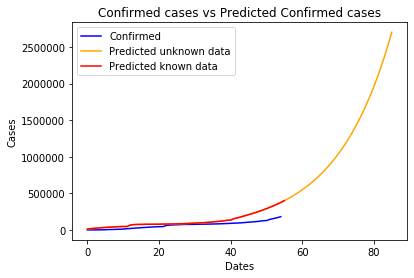

In [44]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(predict_ar_confirmed, label='Predicted unknown data', color='orange')
plt.plot(predict_ar_confirmed[:len(predict_ar_confirmed)-30], label='Predicted known data', color='red')
plt.title('Confirmed cases vs Predicted Confirmed cases')
plt.legend()
plt.show()

In [72]:
model_ar_death = AR(np.asanyarray(date_death['Deaths']))
model_fit_ar_death = model_ar_death.fit()
predict_ar_death = model_fit_ar_death.predict(10, len(date_death) + 40)

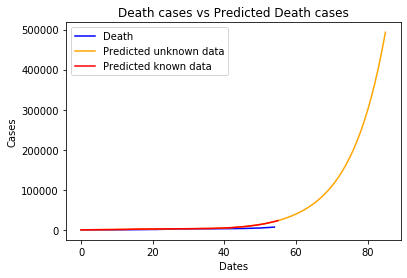

In [73]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_death['Deaths'], label='Death', color='blue')
plt.plot(predict_ar_death, label='Predicted unknown data', color='orange')
plt.plot(predict_ar_death[:len(predict_ar_death)-30], label='Predicted known data', color='red')
plt.title('Death cases vs Predicted Death cases')
plt.legend()
plt.show()

In [75]:
model_ar_recovered = AR(np.asanyarray(date_recovered['Recovered']))
model_fit_ar_recovered = model_ar_recovered.fit()
predict_ar_recovered = model_fit_ar_recovered.predict(10, lФen(date_recovered) + 40)

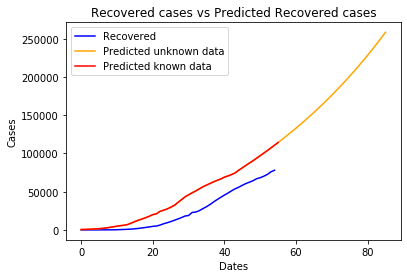

In [76]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_recovered['Recovered'], label='Recovered', color='blue')
plt.plot(predict_ar_recovered, label='Predicted unknown data', color='orange')
plt.plot(predict_ar_recovered[:len(predict_ar_recovered)-30], label='Predicted known data', color='red')
plt.title('Recovered cases vs Predicted Recovered cases')
plt.legend()
plt.show()

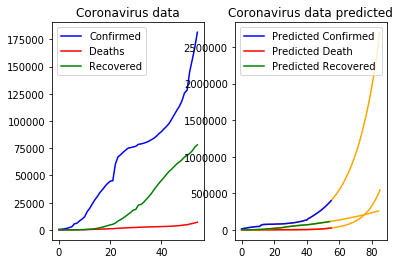

In [49]:
plt.subplot(121)
plt.title('Coronavirus data')
plt.plot(date_confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(date_death['Deaths'], label='Deaths', color='red')
plt.plot(date_recovered['Recovered'], label='Recovered', color='green')
plt.legend()

plt.subplot(122)
plt.title('Coronavirus data predicted')
plt.plot(predict_ar_confirmed, color='orange')
plt.plot(predict_ar_confirmed[:len(predict_ar_confirmed)-30], label='Predicted Confirmed ', color='blue')
plt.plot(predict_ar_death, color = 'orange')
plt.plot(predict_ar_death[:len(predict_ar_death)-30], label='Predicted Death', color = 'red')
plt.plot(predict_ar_recovered,  color = 'orange')
plt.plot(predict_ar_recovered[:len(predict_ar_recovered)-30], label='Predicted Recovered', color = 'green')
plt.legend()
plt.show()

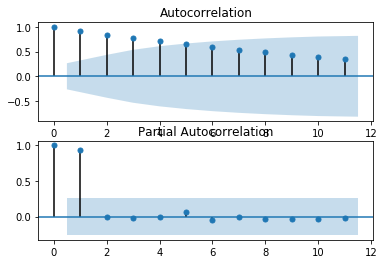

In [50]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(date_confirmed['Confirmed'], lags=11, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(date_confirmed['Confirmed'], lags=11, ax=ax2)
plt.show()

In [77]:
model_ma_confirmed = ARIMA(np.asanyarray(date_confirmed['Confirmed']),  order=(2,0,0))
model_fit_ma_confirmed = model_ma_confirmed.fit(disp=False)
predict_ma_confirmed = model_fit_ma_confirmed.predict(1, len(date_confirmed)+31)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


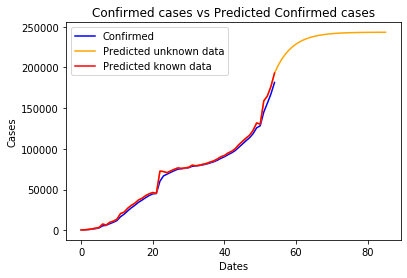

In [78]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(predict_ma_confirmed, label='Predicted unknown data', color='orange')
plt.plot(predict_ma_confirmed[:len(predict_ma_confirmed)-31], label='Predicted known data', color='red')
plt.title('Confirmed cases vs Predicted Confirmed cases')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


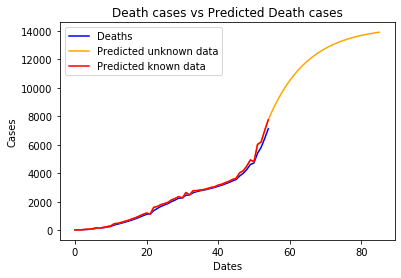

In [80]:
model_ma_death = ARIMA(np.asanyarray(date_death['Deaths']),  order=(2, 0, 0))
model_fit_ma_death = model_ma_death.fit(disp=False)
predict_ma_death = model_fit_ma_death.predict(1, len(date_death) + 31)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_death['Deaths'], label='Deaths', color='blue')
plt.plot(predict_ma_death, label='Predicted unknown data', color='orange')
plt.plot(predict_ma_death[:len(predict_ma_death)-31], label='Predicted known data', color='red')
plt.title('Death cases vs Predicted Death cases')
plt.legend()
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


[2.80000021e+01 3.18232810e+01 4.14702254e+01 4.17345563e+01
 6.38520835e+01 6.92042520e+01 1.48937606e+02 1.43318812e+02
 1.58497418e+02 2.94021784e+02 3.40519457e+02 6.43390789e+02
 7.60652677e+02 1.06076385e+03 1.37196169e+03 1.81792033e+03
 2.48869253e+03 3.16753056e+03 3.81649583e+03 4.58595648e+03
 5.35486188e+03 5.57571920e+03 7.33881256e+03 9.66518872e+03
 1.06138234e+04 1.22050764e+04 1.41491581e+04 1.59646477e+04
 1.77336470e+04 2.00512831e+04 1.95399696e+04 2.65288389e+04
 2.38570748e+04 2.68979985e+04 3.03463090e+04 3.26438913e+04
 3.59143028e+04 3.98414865e+04 4.25815663e+04 4.53906760e+04
 4.82329188e+04 5.06238099e+04 5.38529701e+04 5.61908982e+04
 5.77521285e+04 6.06316551e+04 6.28245304e+04 6.41684020e+04
 6.61287741e+04 6.93722862e+04 6.95282405e+04 7.20076812e+04
 7.47872608e+04 7.91426051e+04 7.99604551e+04 8.16674114e+04
 8.32234966e+04 8.46420457e+04 8.59352149e+04 8.71140860e+04
 8.81887613e+04 8.91684504e+04 9.00615487e+04 9.08757096e+04
 9.16179100e+04 9.229451

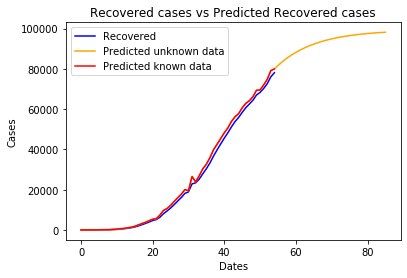

In [81]:
model_ma_recovered = ARIMA(np.asanyarray(date_recovered['Recovered']),  order=(2, 0, 0))
model_fit_ma_recovered = model_ma_recovered.fit(disp=False)
predict_ma_recovered = model_fit_ma_recovered.predict(1, len(date_recovered) + 31)
print(predict_ma_recovered)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_recovered['Recovered'], label='Recovered', color='blue')
plt.plot(predict_ma_recovered, label='Predicted unknown data', color='orange')
plt.plot(predict_ma_recovered[:len(predict_ma_recovered)-31], label='Predicted known data', color='red')
plt.title('Recovered cases vs Predicted Recovered cases')
plt.legend()
plt.show()

In [82]:
model_sarima_confirmed = SARIMAX(np.asanyarray(date_confirmed['Confirmed']),  order=(2,1,0), seasonal_order=(1,1,0,12))
model_fit_sarima_confirmed = model_sarima_confirmed.fit(disp=False, enforce_stationarity=False)
predict_sarima_confirmed = model_fit_sarima_confirmed.predict(1, len(date_confirmed)+31)

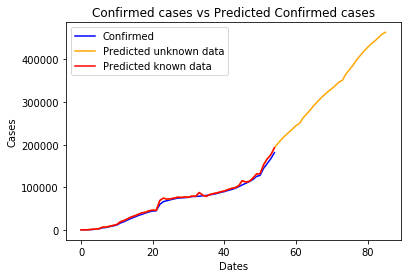

In [83]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(predict_sarima_confirmed, label='Predicted unknown data', color='orange')
plt.plot(predict_sarima_confirmed[:len(predict_sarima_confirmed)-31], label='Predicted known data', color='red')
plt.title('Confirmed cases vs Predicted Confirmed cases')
plt.legend()
plt.show()

In [84]:
model_sarima_death = SARIMAX(np.asanyarray(date_death['Deaths']),  order=(1,1,0), seasonal_order=(1,1,0,12))
model_fit_sarima_death = model_sarima_death.fit(disp=False, enforce_stationarity=False)
predict_sarima_death = model_fit_sarima_death.predict(1, len(date_death)+31)


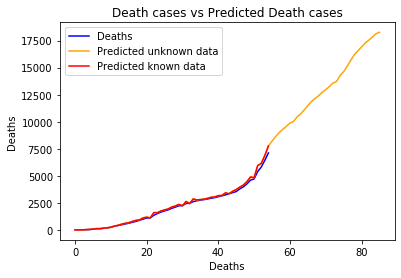

In [85]:
plt.xlabel('Deaths')
plt.ylabel('Deaths')
plt.plot(date_death['Deaths'], label='Deaths', color='blue')
plt.plot(predict_sarima_death, label='Predicted unknown data', color='orange')
plt.plot(predict_sarima_death[:len(predict_sarima_death)-31], label='Predicted known data', color='red')
plt.title('Death cases vs Predicted Death cases')
plt.legend()
plt.show()

In [86]:
model_sarima_recovered = SARIMAX(np.asanyarray(date_recovered['Recovered']),  order=(2,1,0), seasonal_order=(1,1,0,12))
model_fit_sarima_recovered = model_sarima_recovered.fit(disp=False, enforce_stationarity=False)
predict_sarima_recovered = model_fit_sarima_recovered.predict(1, len(date_recovered)+31)


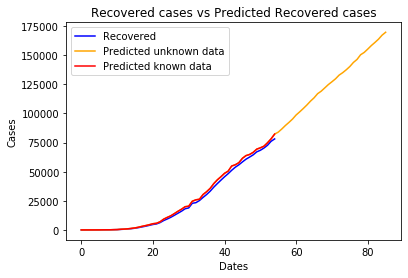

In [87]:
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_recovered['Recovered'], label='Recovered', color='blue')
plt.plot(predict_sarima_recovered, label='Predicted unknown data', color='orange')
plt.plot(predict_sarima_recovered[:len(predict_sarima_recovered)-31], label='Predicted known data', color='red')
plt.title('Recovered cases vs Predicted Recovered cases')
plt.legend()
plt.show()

In [88]:
import scipy.stats as stats

#CONFIRMED
spearman_ar_confirmed = stats.spearmanr(date_confirmed['Confirmed'], predict_ar_confirmed[:len(predict_ar_confirmed)-31])[0]
spearman_arima_confirmed = stats.spearmanr(date_confirmed['Confirmed'], predict_ma_confirmed[:len(predict_ma_confirmed)-31])[0]
spearman_sarima_confirmed = stats.spearmanr(date_confirmed['Confirmed'], predict_sarima_confirmed[:len(predict_sarima_confirmed)-31])[0]
print()
print("SPEARMAN CONFIRMED AR: ", spearman_ar_confirmed)
print("SPEARMAN CONFIRMED ARIMA: ", spearman_arima_confirmed)
print("SPEARMAN CONFIRMED SARIMA: ", spearman_sarima_confirmed)

#DEATH
spearman_ar_death = stats.spearmanr(date_death['Deaths'], predict_ar_death[:len(predict_ar_death)-31])[0]
spearman_arima_death = stats.spearmanr(date_death['Deaths'], predict_ma_death[:len(predict_ma_death)-31])[0]
spearman_sarima_death = stats.spearmanr(date_death['Deaths'], predict_sarima_death[:len(predict_sarima_death)-31])[0]
print()
print("SPEARMAN DEATH AR: ", spearman_ar_death)
print("SPEARMAN DEATH ARIMA: ", spearman_arima_death)
print("SPEARMAN DEATH SARIMA: ", spearman_sarima_death)
#RECOVERED

spearman_ar_recovered = stats.spearmanr(date_recovered['Recovered'], predict_ar_recovered[:len(predict_ar_recovered)-31])[0]
spearman_arima_recovered = stats.spearmanr(date_recovered['Recovered'], predict_ma_recovered[:len(predict_ma_recovered)-31])[0]
spearman_sarima_recovered = stats.spearmanr(date_recovered['Recovered'], predict_sarima_recovered[:len(predict_sarima_recovered)-31])[0]
print()
print("SPEARMAN RECOVERED AR: ", spearman_ar_recovered)
print("SPEARMAN RECOVERED ARIMA: ", spearman_arima_recovered)
print("SPEARMAN RECOVERED SARIMA: ", spearman_sarima_recovered)


SPEARMAN CONFIRMED AR:  0.9998556998557001
SPEARMAN CONFIRMED ARIMA:  0.9992063492063493
SPEARMAN CONFIRMED SARIMA:  0.9973304473304475

SPEARMAN DEATH AR:  0.9999278499278502
SPEARMAN DEATH ARIMA:  0.99963924963925
SPEARMAN DEATH SARIMA:  0.9991341991341994

SPEARMAN RECOVERED AR:  1.0
SPEARMAN RECOVERED ARIMA:  0.9997835497835499
SPEARMAN RECOVERED SARIMA:  1.0
